In [14]:
# Dependencies
import tweepy
import numpy as np
import pandas as pd
import csv

import matplotlib.pyplot as plt
import matplotlib
from scipy import stats
%matplotlib inline
import seaborn as sns

In [15]:
# Create a path to the Team Salary Experience csv and read it into a Pandas DataFrame
csv_path = "team_salary_experience.csv"
team_salary_experience_df = pd.read_csv(csv_path)

with open(csv_path, newline='') as csvfile:

    # CSV reader specifies delimiter and variable that holds contents
    csvreader = csv.reader(csv_path, delimiter=',')
    # Skip the Headers
    next(csvreader,None)
    
team_salary_experience_df.head()

,TEAM,rotation_PL,rotation_HT (cm),rotation_WT (kg),rotation_AG,rotation_EX,rotation_SAL,rotation_CY,Team_Abb,roster_PL,...,roster_EX,roster_SAL,roster_CY,starter_PL,starter_HT (cm),starter_WT (kg),starter_AG,starter_EX,starter_SAL,starter_CY
0,Atlanta Hawks,16,198.9,94.1,24.9,1.6,$4.2M,2.7,ATL,16,...,2.0,$4.2M,2.8,5,201.6,98.6,26.6,3.8,$10.7M,3.2
1,Boston Celtics,12,199.3,101.8,25.5,3.6,$6.8M,2.7,BOS,16,...,3.2,$7.2M,2.9,5,202.2,102.4,25.8,4.4,$12.3M,3.2
2,Brooklyn Nets,14,200.2,98.1,25.1,3.4,$5.2M,2.2,BKN,15,...,3.7,$5.9M,2.4,5,199.2,94.4,25.4,3.8,$8.5M,2.6
3,Charlotte Hornets,12,201.2,98.8,25.8,5.1,$9.5M,2.9,CHA,14,...,4.6,$8.4M,2.9,5,201.2,101.4,28.6,9.0,$16.8M,2.8
4,Chicago Bulls,17,200.7,98.4,24.8,2.4,$3.8M,2.8,CHI,15,...,2.7,$4.2M,3.0,5,203.0,99.4,25.4,3.0,$5.7M,3.4


In [17]:
# Create a path to the Team Salary Experience csv and read it into a Pandas DataFrame
csv_path = "team_salary_experience.csv"
team_salary_experience_df = pd.read_csv(csv_path)

with open(csv_path, newline='') as csvfile:

    # CSV reader specifies delimiter and variable that holds contents
    csvreader = csv.reader(csv_path, delimiter=',')
    # Skip the Headers
    next(csvreader,None)
    
team_salary_experience_df.columns
#print(type(team_salary_experience_df))
#Convert Team Salary - Rotation
team_salary_experience_df['rotation_SAL']=team_salary_experience_df['rotation_SAL'].replace('[\$,]', '', regex=True)
                                                                                                                       #team_salary_experience_df.rotation_SAL=team_salary_experience_df[team_salary_experience_df.columns[6:]].replace('[\$,]', '', regex=True).astype(float)
team_salary_experience_df.rotation_SAL=(team_salary_experience_df.rotation_SAL.replace(r'[KM]+$', '', regex=True).astype(float) * \
    team_salary_experience_df.rotation_SAL.str.extract(r'[\d\.]+([KM]+)', expand=False)
                .fillna(1)
                .replace(['K','M'], [10**3, 10**6]).astype(int))

#Convert Team Salary - Roster

team_salary_experience_df['roster_SAL']=team_salary_experience_df['roster_SAL'].replace('[\$,]', '', regex=True)
                                                                                                                            #team_salary_experience_df.rotation_SAL=team_salary_experience_df[team_salary_experience_df.columns[6:]].replace('[\$,]', '', regex=True).astype(float)
team_salary_experience_df.roster_SAL=(team_salary_experience_df.roster_SAL.replace(r'[KM]+$', '', regex=True).astype(float) * \
    team_salary_experience_df.roster_SAL.str.extract(r'[\d\.]+([KM]+)', expand=False)
                .fillna(1)
                .replace(['K','M'], [10**3, 10**6]).astype(int))
team_salary_experience_df

#Convert Team Salary - Starter

team_salary_experience_df['starter_SAL']=team_salary_experience_df['starter_SAL'].replace('[\$,]', '', regex=True)
                                                                                                                            #team_salary_experience_df.rotation_SAL=team_salary_experience_df[team_salary_experience_df.columns[6:]].replace('[\$,]', '', regex=True).astype(float)
team_salary_experience_df.starter_SAL=(team_salary_experience_df.roster_SAL.replace(r'[KM]+$', '', regex=True).astype(float) * \
    team_salary_experience_df.starter_SAL.str.extract(r'[\d\.]+([KM]+)', expand=False)
                .fillna(1)
                .replace(['K','M'], [10**3, 10**6]).astype(int))
team_salary_experience_df.head()


,TEAM,rotation_PL,rotation_HT (cm),rotation_WT (kg),rotation_AG,rotation_EX,rotation_SAL,rotation_CY,Team_Abb,roster_PL,...,roster_EX,roster_SAL,roster_CY,starter_PL,starter_HT (cm),starter_WT (kg),starter_AG,starter_EX,starter_SAL,starter_CY
0,Atlanta Hawks,16,198.9,94.1,24.9,1.6,4200000.0,2.7,ATL,16,...,2.0,4200000.0,2.8,5,201.6,98.6,26.6,3.8,4.200000e+12,3.2
1,Boston Celtics,12,199.3,101.8,25.5,3.6,6800000.0,2.7,BOS,16,...,3.2,7200000.0,2.9,5,202.2,102.4,25.8,4.4,7.200000e+12,3.2
2,Brooklyn Nets,14,200.2,98.1,25.1,3.4,5200000.0,2.2,BKN,15,...,3.7,5900000.0,2.4,5,199.2,94.4,25.4,3.8,5.900000e+12,2.6
3,Charlotte Hornets,12,201.2,98.8,25.8,5.1,9500000.0,2.9,CHA,14,...,4.6,8400000.0,2.9,5,201.2,101.4,28.6,9.0,8.400000e+12,2.8
4,Chicago Bulls,17,200.7,98.4,24.8,2.4,3800000.0,2.8,CHI,15,...,2.7,4200000.0,3.0,5,203.0,99.4,25.4,3.0,4.200000e+12,3.4


In [18]:
# Create a path to the Team Win csv and read it into a Pandas DataFrame
csv_path = "team_win_data.csv"
team_win_data_df = pd.read_csv(csv_path)

with open(csv_path, newline='') as csvfile:

    # CSV reader specifies delimiter and variable that holds contents
    csvreader = csv.reader(csv_path, delimiter=',')
    # Skip the Headers
    next(csvreader,None)
    
team_win_data_df.head()

,Team Name,W,L,W/L%,GB,PS/G,PA/G,SRS,conference,Team_Abb
0,Toronto Raptors* (1),59,23,0.720,—,111.7,103.9,7.29,East,TOR
1,Boston Celtics* (2),55,27,0.671,4,104.0,100.4,3.23,East,BOS
2,Philadelphia 76ers* (3),52,30,0.634,7,109.8,105.3,4.30,East,PHI
3,Cleveland Cavaliers* (4),50,32,0.610,9,110.9,109.9,0.59,East,CLE
4,Indiana Pacers* (5),48,34,0.585,11,105.6,104.2,1.18,East,IND


In [19]:
 # Merge two dataframes using an inner join
experience_win_data = pd.merge(team_salary_experience_df, team_win_data_df, on="Team_Abb")

experience_win_data.to_csv("experience_win_data.csv")
experience_win_data.head()

,TEAM,rotation_PL,rotation_HT (cm),rotation_WT (kg),rotation_AG,rotation_EX,rotation_SAL,rotation_CY,Team_Abb,roster_PL,...,starter_CY,Team Name,W,L,W/L%,GB,PS/G,PA/G,SRS,conference
0,Atlanta Hawks,16,198.9,94.1,24.9,1.6,4200000.0,2.7,ATL,16,...,3.2,Atlanta Hawks (15),24,58,0.293,35,103.4,108.8,-5.30,East
1,Boston Celtics,12,199.3,101.8,25.5,3.6,6800000.0,2.7,BOS,16,...,3.2,Boston Celtics* (2),55,27,0.671,4,104.0,100.4,3.23,East
2,Brooklyn Nets,14,200.2,98.1,25.1,3.4,5200000.0,2.2,BKN,15,...,2.6,Brooklyn Nets (12),28,54,0.341,31,106.6,110.3,-3.67,East
3,Charlotte Hornets,12,201.2,98.8,25.8,5.1,9500000.0,2.9,CHA,14,...,2.8,Charlotte Hornets (10),36,46,0.439,23,108.2,108.0,0.07,East
4,Chicago Bulls,17,200.7,98.4,24.8,2.4,3800000.0,2.8,CHI,15,...,3.4,Chicago Bulls (13),27,55,0.329,32,102.9,110.0,-6.84,East


In [30]:
# Create a path to the Team Win csv and read it into a Pandas DataFrame
csv_path = "experience_win_data.csv"
experience_win_data_df = pd.read_csv(csv_path)

with open(csv_path, newline='') as csvfile:

    # CSV reader specifies delimiter and variable that holds contents
    csvreader = csv.reader(csv_path, delimiter=',')
    # Skip the Headers
    next(csvreader,None)
    
#experience_win_data_df.columns
experience_win_data_df.head()

,Unnamed: 0,TEAM,rotation_PL,rotation_HT (cm),rotation_WT (kg),rotation_AG,rotation_EX,rotation_SAL,rotation_CY,Team_Abb,...,starter_CY,Team Name,W,L,W/L%,GB,PS/G,PA/G,SRS,conference
0,0,Atlanta Hawks,16,198.9,94.1,24.9,1.6,4200000.0,2.7,ATL,...,3.2,Atlanta Hawks (15),24,58,0.293,35,103.4,108.8,-5.30,East
1,1,Boston Celtics,12,199.3,101.8,25.5,3.6,6800000.0,2.7,BOS,...,3.2,Boston Celtics* (2),55,27,0.671,4,104.0,100.4,3.23,East
2,2,Brooklyn Nets,14,200.2,98.1,25.1,3.4,5200000.0,2.2,BKN,...,2.6,Brooklyn Nets (12),28,54,0.341,31,106.6,110.3,-3.67,East
3,3,Charlotte Hornets,12,201.2,98.8,25.8,5.1,9500000.0,2.9,CHA,...,2.8,Charlotte Hornets (10),36,46,0.439,23,108.2,108.0,0.07,East
4,4,Chicago Bulls,17,200.7,98.4,24.8,2.4,3800000.0,2.8,CHI,...,3.4,Chicago Bulls (13),27,55,0.329,32,102.9,110.0,-6.84,East


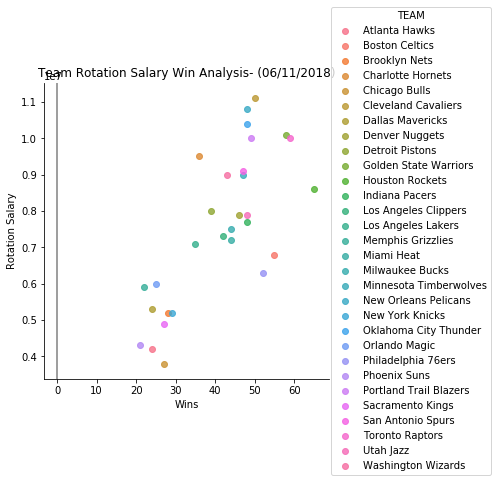

In [29]:
#colors=["xkcd:light blue","xkcd:forest green","xkcd:red","xkcd:royal blue","xkcd:yellow"]    
#sns.lmplot('W',"rotation_SAL", experience_win_data_df)
sns.lmplot("W",'rotation_SAL', experience_win_data_df,fit_reg=False,hue = 'TEAM')
#sns.lmplot('W',"rotation_SAL", experience_win_data_df,hue = 'TEAM')
#palette=colors,scatter_kws={"marker":"o","s":100,"edgecolor":"k"})
plt.title("Team Rotation Salary Win Analysis- (06/11/2018)")
plt.xlabel("Wins")
plt.ylabel("Rotation Salary")
plt.axvline(0, color="black",alpha=0.5)
plt.savefig("Team Rotation Salary Win Analysis")
plt.show()

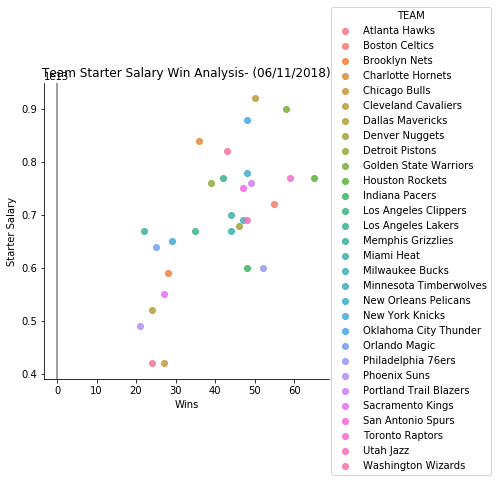

In [22]:
#colors=["xkcd:light blue","xkcd:forest green","xkcd:red","xkcd:royal blue","xkcd:yellow"]    
#sns.lmplot('W',"starter_SAL", experience_win_data_df)
sns.lmplot('W',"starter_SAL", experience_win_data_df,fit_reg=False,hue = 'TEAM')
#sns.lmplot('W',"starter_SAL", experience_win_data_df,hue = 'TEAM')
#palette=colors,scatter_kws={"marker":"o","s":100,"edgecolor":"k"})
plt.title("Team Starter Salary Win Analysis- (06/11/2018)")
plt.xlabel("Wins")
plt.ylabel("Starter Salary")
plt.axvline(0, color="black",alpha=0.5)
plt.savefig("Team Starter Salary Win Analysis")
plt.show()

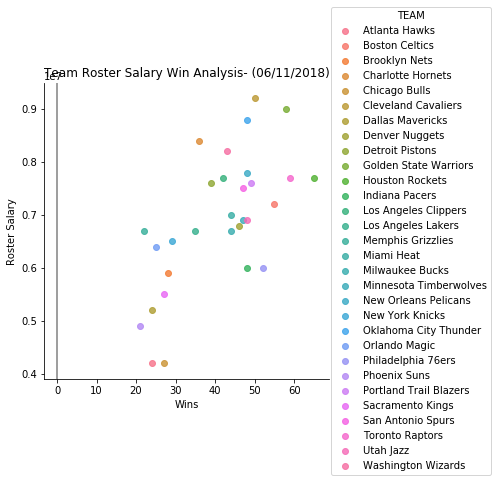

In [23]:
#colors=["xkcd:light blue","xkcd:forest green","xkcd:red","xkcd:royal blue","xkcd:yellow"]    
#sns.lmplot('W',"roster_SAL", experience_win_data_df)
sns.lmplot('W',"roster_SAL", experience_win_data_df,fit_reg=False,hue = 'TEAM')
#sns.lmplot('W',"roster_SAL", experience_win_data_df,hue = 'TEAM')
#palette=colors,scatter_kws={"marker":"o","s":100,"edgecolor":"k"})
plt.title("Team Roster Salary Win Analysis- (06/11/2018)")
plt.xlabel("Wins")
plt.ylabel("Roster Salary")
plt.axvline(0, color="black",alpha=0.5)
plt.savefig("Team Roster Salary Win Analysis")
plt.show()

In [26]:
#Roster
#calulate the linear regression r-squared and p.value
slope, intercept, r_value, p_value, std_err = stats.linregress(x=experience_win_data["W"], y=experience_win_data["roster_SAL"])
r_squared=r_value**2
print("r_squared = " , r_squared )
print("p_value = ", p_value)

r_squared =  0.4428944644092819
p_value =  5.994565843875665e-05


In [27]:
#Rotation
#calulate the linear regression r-squared and p.value
slope, intercept, r_value, p_value, std_err = stats.linregress(x=experience_win_data["W"], y=experience_win_data["rotation_SAL"])
r_squared=r_value**2
print("r_squared = " , r_squared )
print("p_value = ", p_value)

r_squared =  0.5721286290209162
p_value =  1.330031419576712e-06


In [28]:
#Starter
#calulate the linear regression r-squared and p.value
slope, intercept, r_value, p_value, std_err = stats.linregress(x=experience_win_data["W"], y=experience_win_data["starter_SAL"])
r_squared=r_value**2
print("r_squared = " , r_squared )
print("p_value = ", p_value)

r_squared =  0.44289446440928176
p_value =  5.9945658438756984e-05
